## Import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,BatchNormalization
import pickle
import cv2

2024-05-30 15:19:30.675880: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-30 15:19:30.676101: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 15:19:30.678224: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 15:19:30.708023: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 15:19:31.200540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

## GET DATA SET

In [2]:
mnist = tf.keras.datasets.mnist

(m_image_train, m_label_train), (m_image_test, m_label_test) = mnist.load_data()

## Mnist CNN without Batch

In [3]:
model = Sequential()
model.add(Conv2D(32,(2,2),activation="sigmoid",input_shape=(28,28,1)))
model.add(Conv2D(64,(2,2),activation="sigmoid"))
model.add(Conv2D(128,(2,2),2,activation="sigmoid"))
model.add(Conv2D(32,(2,2),activation="sigmoid"))
model.add(Conv2D(64,(2,2),activation="sigmoid"))
model.add(Conv2D(128,(2,2),2,activation="sigmoid"))
model.add(Flatten())
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"]
)
history_without_batch = model.fit(m_image_train, m_label_train, epochs=10, batch_size=20, validation_data=(m_image_test,m_label_test))

model.summary()

model.save('mnist_without_batch.h5')

with open('history_without_batch', 'wb') as file_pi:
    pickle.dump(history_without_batch.history, file_pi)

Epoch 1/10


/home/kjh/perceptron/.percep_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.1041 - loss: 2.3278 - val_accuracy: 0.1010 - val_loss: 2.3144
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 58s 19ms/step - accuracy: 0.1037 - loss: 2.3112 - val_accuracy: 0.0982 - val_loss: 2.3108
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - accuracy: 0.1047 - loss: 2.3106 - val_accuracy: 0.0974 - val_loss: 2.3057
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1024 - loss: 2.3101 - val_accuracy: 0.1009 - val_loss: 2.3133
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - accuracy: 0.1038 - loss: 2.3106 - val_accuracy: 0.1010 - val_loss: 2.3160
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 90s 21ms/step - accuracy: 0.1036 - loss: 2.3100 - val_accuracy: 0.0980 - val_loss: 2.3082
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 56s 19ms/step - accuracy: 0.1051 - loss: 2.3093 - val_accuracy: 0.1032 - val_loss: 2.3183
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 87s 20ms/step - accuracy: 0.1016 - loss: 2.31

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,529,696 (5.84 MB)

 Trainable params: 509,898 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,798 (3.89 MB)

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
historyNoBatch = pickle.load(open('./history_without_batch', "rb"))
historyBatch = pickle.load(open('./history_with_batch', "rb"))
historylelu = pickle.load(open('./history_relu', "rb"))
val_accNB = historyNoBatch["val_accuracy"]
val_lossNB= historyNoBatch["val_loss"]
val_lossB = historyBatch["val_loss"]
val_accB = historyBatch["val_accuracy"]
val_lossL = historylelu["val_loss"]
val_accL = historylelu["val_accuracy"]

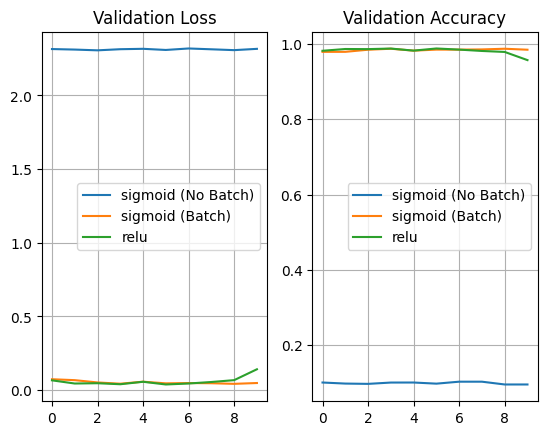

<Figure size 640x480 with 0 Axes>

In [10]:
plt.subplot(1,2,1)
plt.title('Validation Loss')
plt.plot(range(len(val_lossNB)),val_lossNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_lossB)),val_lossB,label = "sigmoid (Batch)")
plt.plot(range(len(val_lossL)),val_lossL,label = "relu")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Accuracy')
plt.plot(range(len(val_accNB)),val_accNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_accB)),val_accB,label = "sigmoid (Batch)")
plt.plot(range(len(val_accL)),val_accL,label = "relu")
plt.grid()
plt.legend()
plt.savefig("Summary.png")
plt.show()

In [11]:
plt.savefig("Summary.png")

<Figure size 640x480 with 0 Axes>